# Homework #1: Analyze Surface Air Temperature

#### Download the ERA5 2-meter air temperature dataset from the following link:

[Download ERA5 Data](https://drive.google.com/file/d/1Pih7qu0XUHOlPFUeKRMoiXFaWE2m_Y0G/view?usp=drive_link)

#### After downloading, move the file into your course working directory.

---

### Instructions
- Please work through this notebook on your own and complete Questions 1–4 to earn the full 10 points for Homework #1!
- If you are new to Python or to the libraries used here, spend extra time carefully reviewing each command.  
- I will go over this notebook in class.  
- If you need additional help or have questions, feel free to reach out and schedule a meeting with me.  

In [1]:
# Import Python libraries for data analysis, plotting, and mapping
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [2]:
#print working directory; Equivalent to running pwd in a terminal.
! pwd

/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course


### Loading Dataset

In [3]:
# Define and open a NetCDF dataset using xarray
ds_t2m = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.t2m.194001-202507.nc")

In [4]:
#show information about this dataset
ds_t2m

<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 1027, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-07-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-13T00:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
# Rename coordinates to shorter names for later analysis
ds_t2m = ds_t2m.rename({
    'valid_time': 'time',
    'latitude': 'lat',
    'longitude': 'lon'
})

# Extract the 2-meter temperature variable
t2m = ds_t2m['t2m'].sel(time=slice("1940-01-01", "2024-12-31"))

# Display the DataArray
t2m

<xarray.DataArray 't2m' (time: 1020, lat: 721, lon: 1440)> Size: 4GB
[1059004800 values with dtype=float32]
Coordinates:
    number   int64 8B ...
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2024-12-01
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    expver   (time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [6]:
 #convert K to °C
t2m = t2m - 273.15 

## Example 1 Global Analysis: 
### 1) Climatology of global near-surface air temperature (T2m) during 1940–present

In [7]:
# Compute annual mean climatology
annual_mean_t2m = t2m.mean(dim='time')

# Compute seasonal mean climatology
#groups the data by season (DJF, MAM, JJA, SON), calculates the average for each season over the whole dataset
seasonal_mean_t2m = t2m.groupby('time.season').mean(dim='time')

# Define order of seasons
seasons_order = ['DJF', 'MAM', 'JJA', 'SON']
seasonal_mean_t2m = seasonal_mean_t2m.sel(season=seasons_order)

In [8]:
annual_mean_t2m

<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
array([[-14.917984, -14.917984, -14.917984, ..., -14.917984, -14.917984,
        -14.917984],
       [-14.907106, -14.906928, -14.906801, ..., -14.907597, -14.907401,
        -14.907303],
       [-14.858364, -14.857998, -14.8576  , ..., -14.859495, -14.85921 ,
        -14.858849],
       ...,
       [-45.19531 , -45.194416, -45.192654, ..., -45.197926, -45.196396,
        -45.195477],
       [-45.305325, -45.304058, -45.30277 , ..., -45.307446, -45.30674 ,
        -45.306072],
       [-45.841232, -45.841232, -45.841232, ..., -45.841232, -45.841232,
        -45.841232]], shape=(721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

In [9]:
seasonal_mean_t2m

<xarray.DataArray 't2m' (season: 4, lat: 721, lon: 1440)> Size: 17MB
array([[[-26.63346   , -26.63346   , -26.63346   , ..., -26.63346   ,
         -26.63346   , -26.63346   ],
        [-26.56622   , -26.565989  , -26.565805  , ..., -26.566916  ,
         -26.566631  , -26.56654   ],
        [-26.456852  , -26.456392  , -26.45588   , ..., -26.45846   ,
         -26.457962  , -26.457518  ],
        ...,
        [-31.290215  , -31.290245  , -31.290062  , ..., -31.289778  ,
         -31.289587  , -31.28971   ],
        [-31.41739   , -31.417198  , -31.417053  , ..., -31.417612  ,
         -31.417551  , -31.417475  ],
        [-31.722645  , -31.722645  , -31.722645  , ..., -31.722645  ,
         -31.722645  , -31.722645  ]],

       [[-18.363913  , -18.363913  , -18.363913  , ..., -18.363913  ,
         -18.363913  , -18.363913  ],
        [-18.360176  , -18.360037  , -18.359983  , ..., -18.360458  ,
         -18.360367  , -18.360275  ],
        [-18.310503  , -18.310373  , -18.310165  , ..., -18.311268  ,
         -18.311047  , -18.31081   ],
...
         -53.66112   , -53.65922   ],
        [-53.77444   , -53.772373  , -53.77036   , ..., -53.778004  ,
         -53.77682   , -53.775597  ],
        [-54.49588   , -54.49588   , -54.49588   , ..., -54.49588   ,
         -54.49588   , -54.49588   ]],

       [[-14.933359  , -14.933359  , -14.933359  , ..., -14.933359  ,
         -14.933359  , -14.933359  ],
        [-14.945974  , -14.945652  , -14.945338  , ..., -14.947107  ,
         -14.9466715 , -14.946387  ],
        [-14.9112625 , -14.910535  , -14.909768  , ..., -14.913706  ,
         -14.913085  , -14.912235  ],
        ...,
        [-45.65644   , -45.656136  , -45.654903  , ..., -45.65736   ,
         -45.656433  , -45.65602   ],
        [-45.69558   , -45.694637  , -45.693665  , ..., -45.697075  ,
         -45.696583  , -45.69614   ],
        [-46.146126  , -46.146126  , -46.146126  , ..., -46.146126  ,
         -46.146126  , -46.146126  ]]],
      shape=(4, 721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * season   (season) object 32B 'DJF' 'MAM' 'JJA' 'SON'

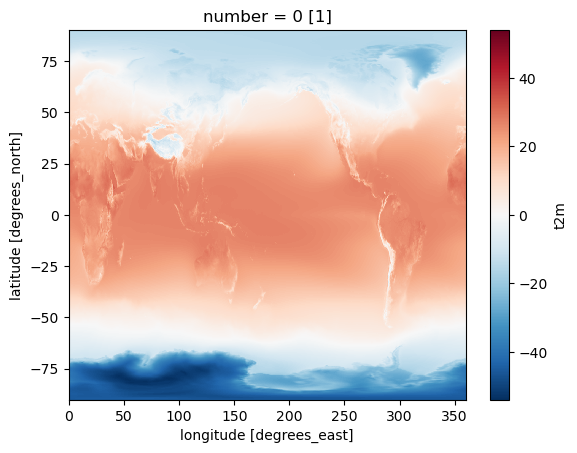

In [10]:
# xarray provides a convenient wrapper around Matplotlib for quick plotting.
# Additional settings to improve the plot will be shown in the next cell.
annual_mean_t2m.plot()

In [11]:
vmin = -32.
vmax = 34.
contour_interval = 2.
def plot_sst(ax, sst, cmap="RdBu_r", levels=np.arange(vmin, vmax, contour_interval)):
    """
    Plot sea surface temperature (SST) on a given axis with contour fill only.

    Parameters:
        ax     : matplotlib axis with a Cartopy projection
        sst    : xarray DataArray of SST
        cmap   : colormap name (default: "RdBu_r")
        levels : contour levels for filled contours
    """
    # Add cyclic point to wrap longitude around the globe
    sst_cyclic, lon_cyclic = add_cyclic_point(sst.values, coord=sst.lon)

    # Contour-filled SST plot
    mappable = ax.contourf(
        lon_cyclic, sst.lat, sst_cyclic,
        transform=ccrs.PlateCarree(),
        cmap=cmap, levels=levels, extend='both'
    )

    # Full global extent
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    # Coastlines
    ax.add_feature(cfeature.COASTLINE)

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=8, length=1)

    # Tick locations
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

    # Formatters for longitude and latitude
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Hide axis labels to keep plots clean
    ax.set_xlabel('')
    ax.set_ylabel('')

    return mappable

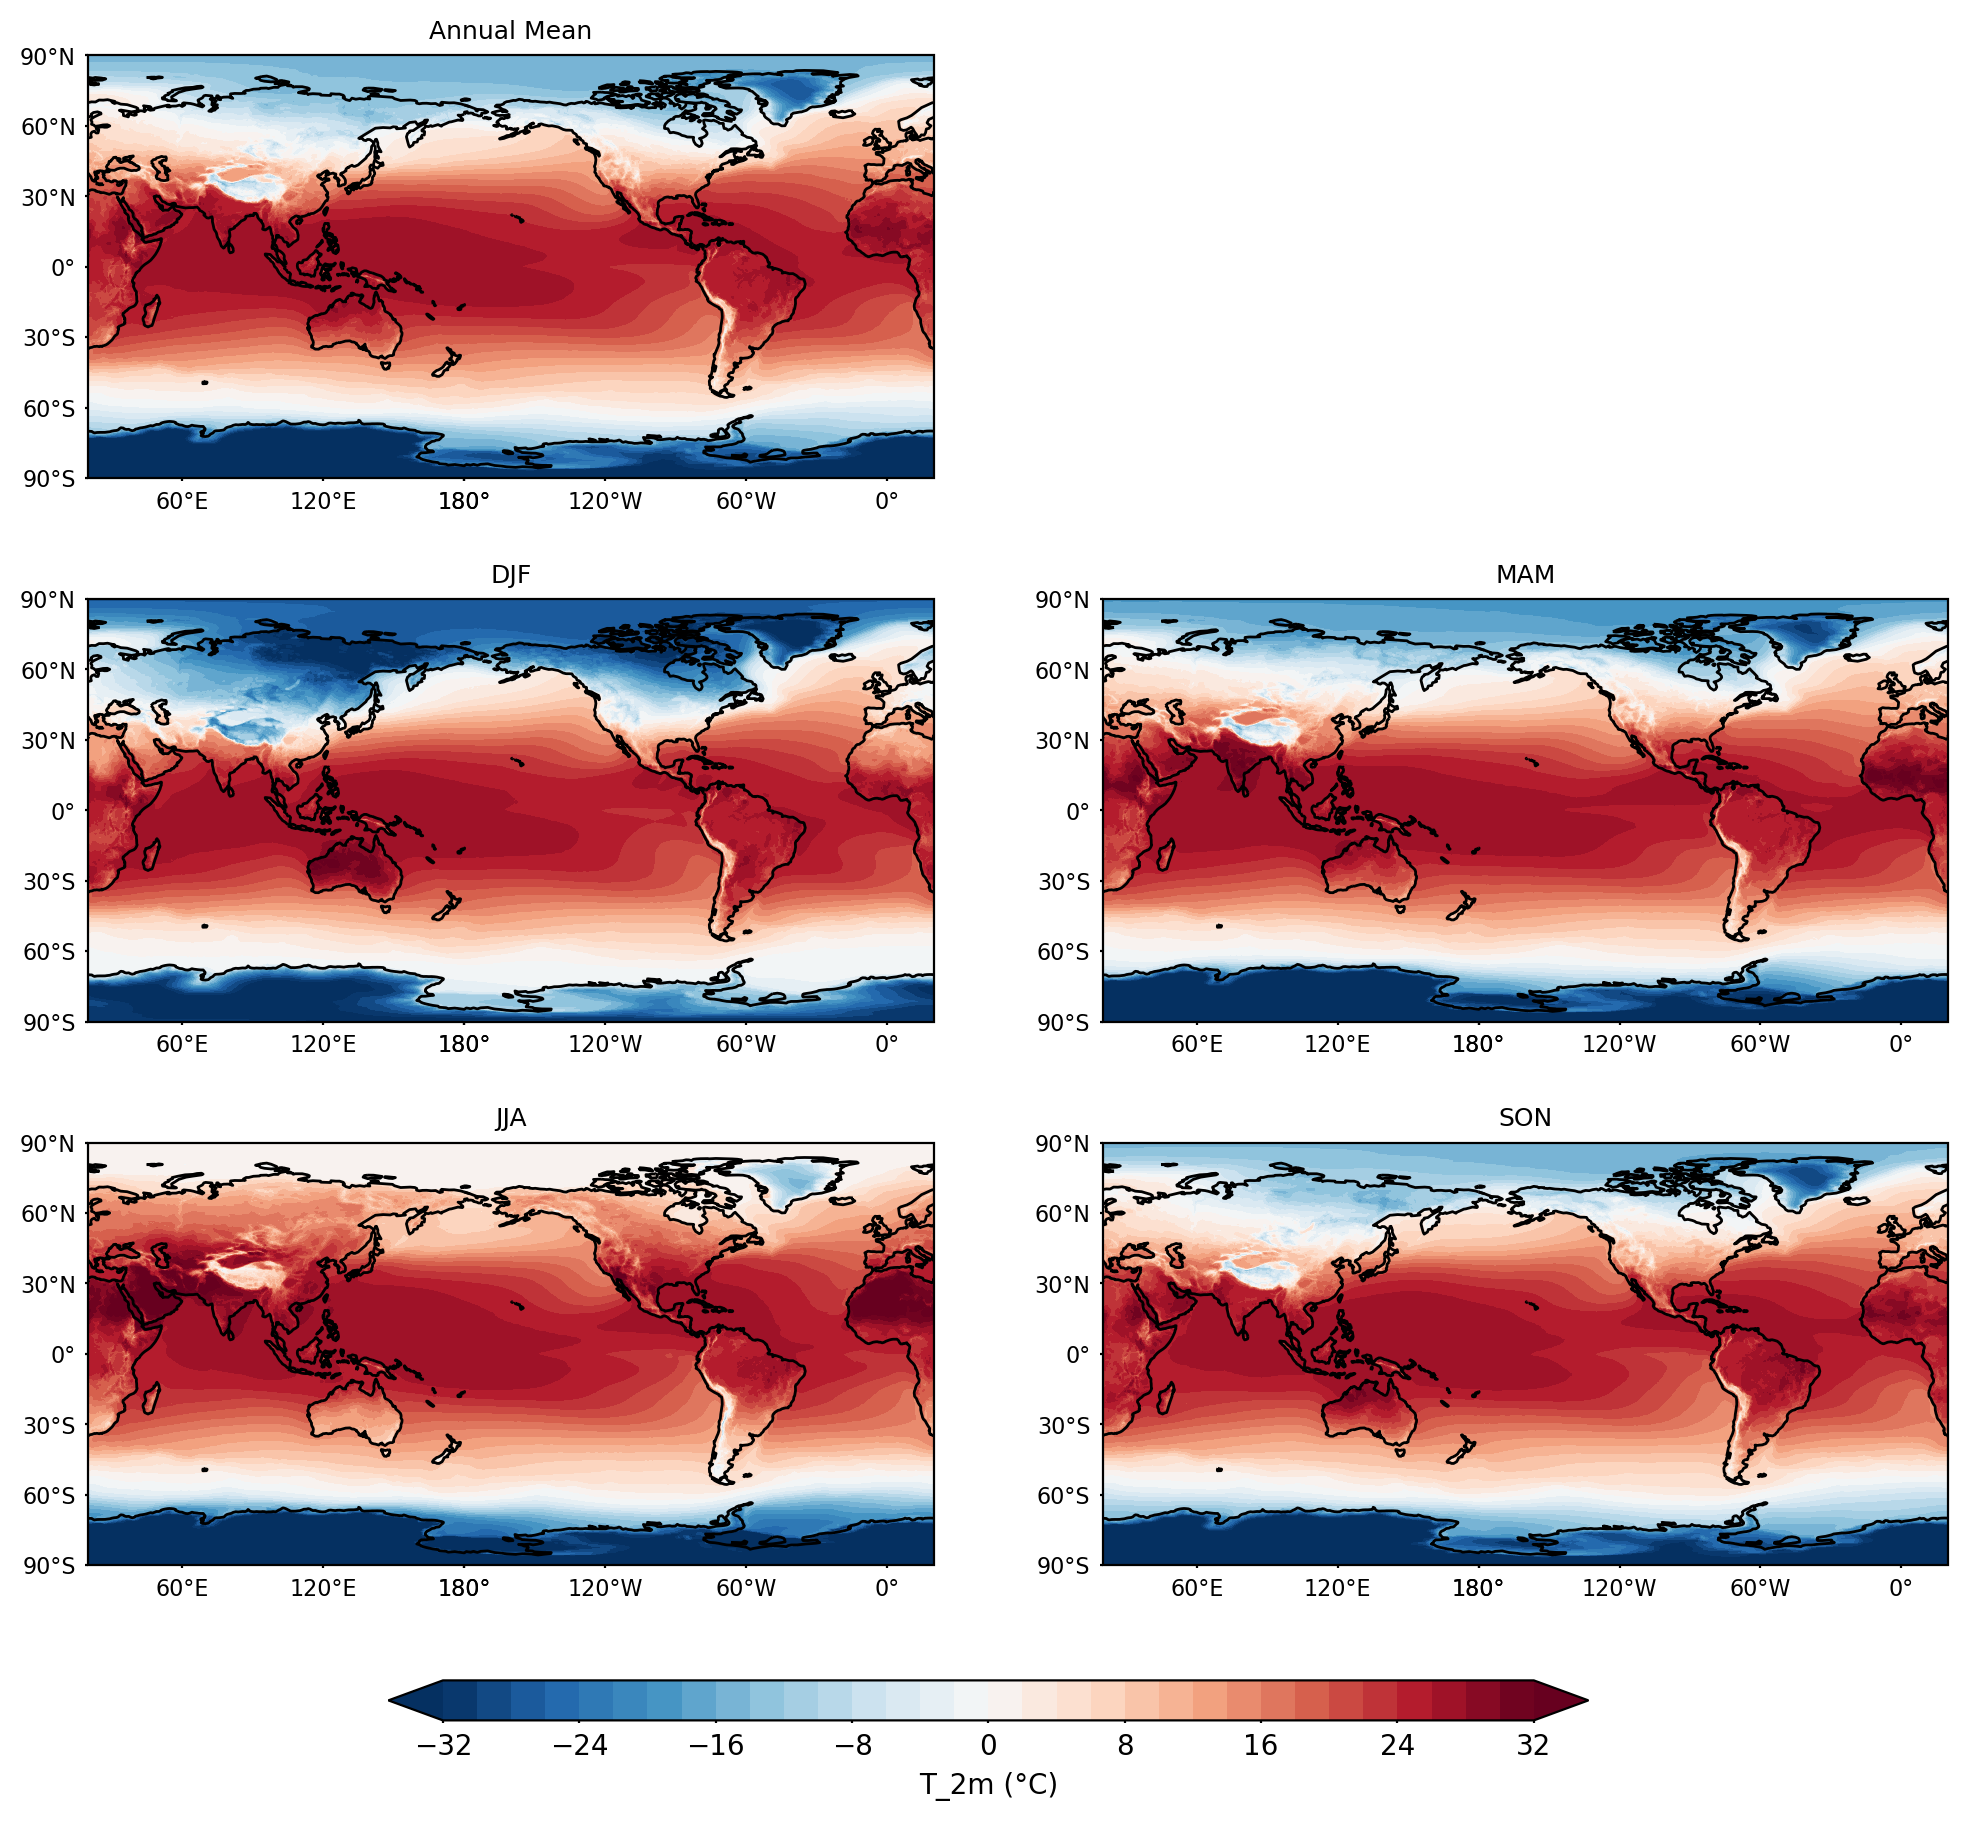

In [12]:
# Create figure layout (3 rows × 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160)}, dpi=200)

# Annual mean in the top-left subplot
mappable = plot_sst(axes[0, 0], annual_mean_t2m)
axes[0, 0].set_title('Annual Mean', fontsize=9)
axes[0, 1].remove()  # Remove unused subplot


# Seasonal means in remaining positions
for i, season in enumerate(seasons_order):
    row = i // 2 + 1
    col = i % 2
    mappable = plot_sst(axes[row, col], seasonal_mean_t2m.sel(season=season))
    axes[row, col].set_title(season, fontsize=9)
# Shared colorbar at the bottom
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
fig.colorbar(mappable, cax=cbar_ax, label='T_2m (°C)', orientation='horizontal')
cbar_ax.tick_params(which='both', length=1)

### <span style="color:blue">Q1 (1 point – Interpretation): Describe your findings on the climatology of global 2 m surface air temperature.</span>

- Which regions are the warmest and coldest globally?  
- Why do the poles, tropics, and deserts exhibit their characteristic temperatures?  
- How do oceans and continents contribute differently to the global mean temperature?  
- Which hemisphere is warmer in each season (DJF, MAM, JJA, SON)?  
- How do the poles and tropics differ in their seasonal temperature patterns?  


A1: 

### 1) Global wintertime (DJF) T2m anomaly for a specific year

In [13]:
# Compute seasonal mean for each year (not climatology)
djf_t2m =  t2m.groupby('time.season')['DJF'].groupby('time.year').mean(dim='time')
djf_t2m

<xarray.DataArray 't2m' (year: 85, lat: 721, lon: 1440)> Size: 353MB
array([[[-26.483023, -26.483023, -26.483023, ..., -26.483023,
         -26.483023, -26.483023],
        [-26.49409 , -26.49409 , -26.49409 , ..., -26.493439,
         -26.493439, -26.49409 ],
        [-26.485626, -26.484976, -26.484976, ..., -26.484324,
         -26.484976, -26.484976],
        ...,
        [-33.096954, -33.096302, -33.096302, ..., -33.097607,
         -33.096954, -33.096302],
        [-33.242786, -33.242138, -33.242138, ..., -33.24344 ,
         -33.242786, -33.242786],
        [-33.62625 , -33.62625 , -33.62625 , ..., -33.62625 ,
         -33.62625 , -33.62625 ]],

       [[-27.897125, -27.897125, -27.897125, ..., -27.897125,
         -27.897125, -27.897125],
        [-27.806631, -27.805979, -27.805328, ..., -27.807932,
         -27.807932, -27.806631],
        [-27.718088, -27.717438, -27.716135, ..., -27.721994,
         -27.720694, -27.71939 ],
...
        [-32.59107 , -32.59172 , -32.59172 , ..., -32.589115,
         -32.589767, -32.589767],
        [-32.599533, -32.599533, -32.59888 , ..., -32.598232,
         -32.59888 , -32.59888 ],
        [-32.805912, -32.805912, -32.805912, ..., -32.805912,
         -32.805912, -32.805912]],

       [[-21.799276, -21.799276, -21.799276, ..., -21.799276,
         -21.799276, -21.799276],
        [-21.779745, -21.778442, -21.777792, ..., -21.780396,
         -21.779745, -21.779745],
        [-21.72701 , -21.725058, -21.723755, ..., -21.728964,
         -21.727661, -21.72701 ],
        ...,
        [-32.475056, -32.475056, -32.475056, ..., -32.475708,
         -32.475056, -32.475056],
        [-32.585083, -32.585083, -32.585083, ..., -32.585735,
         -32.585735, -32.585083],
        [-32.941853, -32.941853, -32.941853, ..., -32.941853,
         -32.941853, -32.941853]]], shape=(85, 721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * year     (year) int64 680B 1940 1941 1942 1943 1944 ... 2021 2022 2023 2024

In [14]:
# DJF climatology from the seasonal mean array calculated in Example 1
djf_clim = seasonal_mean_t2m.sel(season='DJF')

# DJF anomalies for specific years
djf_1997_98_anom = djf_t2m.sel(year=1998) - djf_clim  #(Dec 1997 + Jan 1998 + Feb 1998)/3.

In [15]:
# Adjustable plotting for a single map
def plot_single_map(data, title, vmin=-5, vmax=5, interval=0.5, cmap="RdBu_r",cbar_name = 'T2m anomaly (°C)'):
    """
    Plot a single map with adjustable levels, colorbar, and existing settings.

    Parameters:
        data       : xarray DataArray to plot
        title      : plot title
        vmin       : min value of color scale
        vmax       : max value of color scale
        interval   : contour interval
        cmap       : colormap
    """
    # Create figure and axis with PlateCarree projection centered at 180°
    fig = plt.figure(figsize=(4, 4), dpi=200)
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

    # Create contour levels dynamically
    levels = np.arange(vmin, vmax + interval, interval)

    # Plot data using your existing plot_sst function
    mappable = plot_sst(ax, data, cmap=cmap, levels=levels)
    ax.set_title(title, fontsize=10)

    # Add horizontal colorbar with adjustable height
    cbar_ax = fig.add_axes([0.1, 0.2, 0.8,0.02])  # [left, bottom, width, height]
    cbar = fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')
    cbar.ax.tick_params(which='both', length=1)
    cbar.set_label(cbar_name, fontsize=9)
    plt.show()

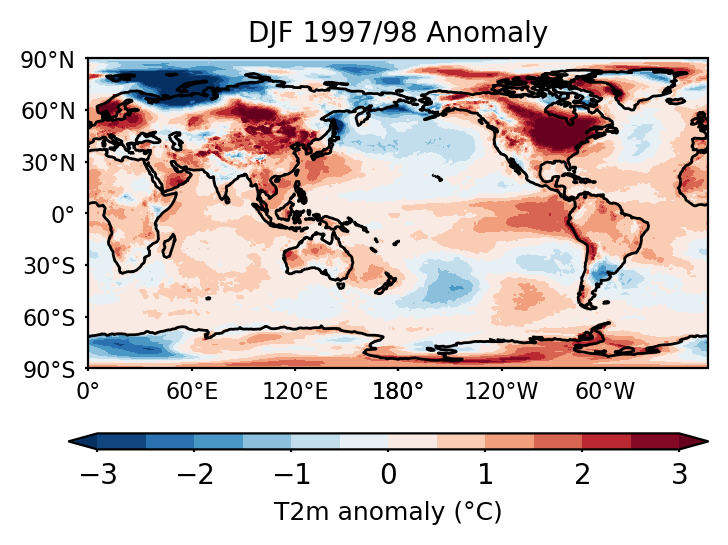

In [16]:
# DJF anomaly for an El Nino year
plot_single_map(djf_1997_98_anom, 'DJF 1997/98 Anomaly', vmin=-3, vmax=3, interval=0.5, cbar_name = 'T2m anomaly (°C)')

### <span style="color:blue">Q2 (1 point – Interpretation): How does the winter of 1997/98 deviate from the DJF climatology？ </span>

- Identify regions that are warmer or colder than usual. Where are the largest positive and negative anomalies located?  
- Discuss possible physical or climatic reasons for these anomalies (e.g., El Niño influence).  

A2: 

### 3) Linear trend of Global T2m

In [17]:
def trend_linear(da, dim='time'):
    """
    Compute linear trend of an xarray DataArray along a specified dimension.

    Parameters:
        da  : xarray DataArray
        dim : dimension along which to compute the trend (default 'time')

    Returns:
        trend : xarray DataArray of the fitted linear trend (same shape as da)
        slope : xarray DataArray of the slope per unit of dim
    """
    # Fit 1st-degree polynomial
    p = da.polyfit(dim=dim, deg=1)

    # Linear trend (fitted values)
    trend = xr.polyval(da[dim], p.polyfit_coefficients)

    # Slope
    slope = p.polyfit_coefficients.sel(degree=1)

    return trend, slope

In [18]:
annual_t2m = t2m.groupby('time.year').mean(dim='time')
annual_t2m

<xarray.DataArray 't2m' (year: 85, lat: 721, lon: 1440)> Size: 353MB
array([[[-14.919995 , -14.919995 , -14.919995 , ..., -14.919995 ,
         -14.919995 , -14.919995 ],
        [-14.964755 , -14.964755 , -14.964755 , ..., -14.964917 ,
         -14.964917 , -14.96508  ],
        [-14.975334 , -14.974846 , -14.974521 , ..., -14.975986 ,
         -14.975986 , -14.975659 ],
        ...,
        [-46.735096 , -46.73477  , -46.733307 , ..., -46.73689  ,
         -46.735584 , -46.734936 ],
        [-46.81648  , -46.81534  , -46.814037 , ..., -46.818104 ,
         -46.81729  , -46.816803 ],
        [-47.43041  , -47.43041  , -47.43041  , ..., -47.43041  ,
         -47.43041  , -47.43041  ]],

       [[-16.053404 , -16.053404 , -16.053404 , ..., -16.053404 ,
         -16.053404 , -16.053404 ],
        [-16.013365 , -16.013039 , -16.012877 , ..., -16.013689 ,
         -16.013689 , -16.013365 ],
        [-15.974301 , -15.974301 , -15.973976 , ..., -15.974953 ,
         -15.97479  , -15.9746275],
...
        [-44.37283  , -44.37299  , -44.371853 , ..., -44.3725   ,
         -44.372013 , -44.372177 ],
        [-44.343533 , -44.342556 , -44.341904 , ..., -44.343857 ,
         -44.34402  , -44.343533 ],
        [-44.776474 , -44.776474 , -44.776474 , ..., -44.776474 ,
         -44.776474 , -44.776474 ]],

       [[-12.134318 , -12.134318 , -12.134318 , ..., -12.134318 ,
         -12.134318 , -12.134318 ],
        [-12.1571045, -12.156779 , -12.156453 , ..., -12.157593 ,
         -12.15743  , -12.15743  ],
        [-12.13269  , -12.131714 , -12.131389 , ..., -12.133667 ,
         -12.133179 , -12.13269  ],
        ...,
        [-43.713745 , -43.713257 , -43.711956 , ..., -43.716675 ,
         -43.715046 , -43.71407  ],
        [-43.763386 , -43.76241  , -43.761433 , ..., -43.765503 ,
         -43.765015 , -43.764202 ],
        [-44.387897 , -44.387897 , -44.387897 , ..., -44.387897 ,
         -44.387897 , -44.387897 ]]], shape=(85, 721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * year     (year) int64 680B 1940 1941 1942 1943 1944 ... 2021 2022 2023 2024

In [19]:
trend_fit, slope = trend_linear(annual_t2m, dim='year')  # slope: °C/year

In [20]:
slope

<xarray.DataArray 'polyfit_coefficients' (lat: 721, lon: 1440)> Size: 8MB
array([[0.04850489, 0.04850489, 0.04850489, ..., 0.04850489, 0.04850489,
        0.04850489],
       [0.04791006, 0.04791315, 0.0479147 , ..., 0.04790504, 0.04790672,
        0.04790854],
       [0.04783255, 0.04783784, 0.047841  , ..., 0.04781987, 0.04782417,
        0.04783035],
       ...,
       [0.01245811, 0.0124524 , 0.01244573, ..., 0.0124746 , 0.01246873,
        0.01246327],
       [0.01326955, 0.01326558, 0.01326035, ..., 0.01327683, 0.01327293,
        0.01327033],
       [0.01763453, 0.01763453, 0.01763453, ..., 0.01763453, 0.01763453,
        0.01763453]], shape=(721, 1440))
Coordinates:
    degree   int64 8B 1
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

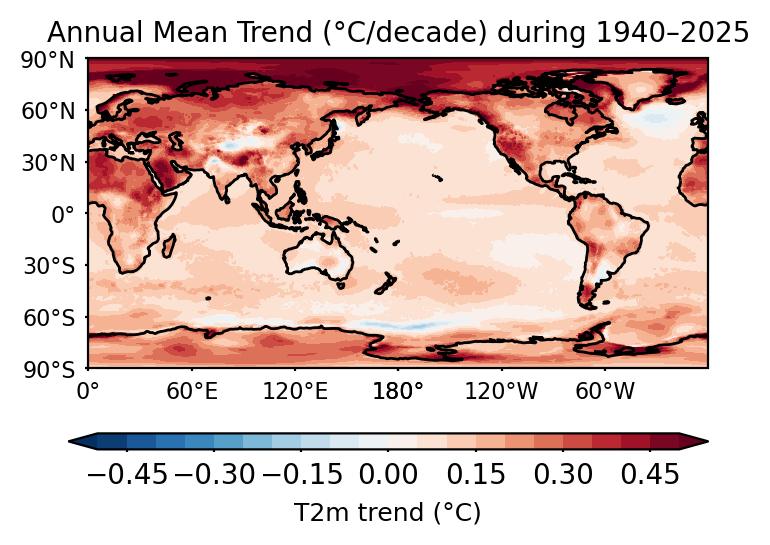

In [21]:
# plot trend °C/year
plot_single_map(slope*10, 'Annual Mean Trend (°C/decade) during 1940–2025', vmin=-0.5, vmax=0.5, interval=0.05, cbar_name = 'T2m trend (°C)')

### <span style="color:blue">Q3 (1 point – Interpretation): Analyze the global annual mean T2m trend (°C/decade) during 1940–2024 </span>
- Identify regions with strong warming, weak warming, or cooling trends.  
- Are there high-latitude or polar regions with particularly strong trends? Why might this be the case?  
- For regions showing cooling trends? Discuss possible reasons.  

A3:

## Example 3: Global Average: Timeseries of monthly global averaged T2m

In [25]:
def area_weighted_mean(dataarray, lat_name='lat'):
    """
    Compute area-weighted mean of a DataArray.
    Assumes dataarray has a latitude dimension named 'lat' or specified by lat_name.
    """
    weights = np.cos(np.deg2rad(dataarray[lat_name]))
    weights.name = "weights"
    
    weighted_data = dataarray.weighted(weights)
    return weighted_data.mean(dim=[lat_name, 'lon'])

In [26]:
global_t2m = area_weighted_mean(t2m)
global_t2m

<xarray.DataArray 't2m' (time: 1020)> Size: 8kB
array([11.49666461, 11.87216571, 12.52400178, ..., 15.24526696,
       14.09847704, 13.42388301], shape=(1020,))
Coordinates:
    number   int64 8B 0
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2024-12-01
    expver   (time) <U4 16kB '0001' '0001' '0001' ... '0001' '0001' '0001'

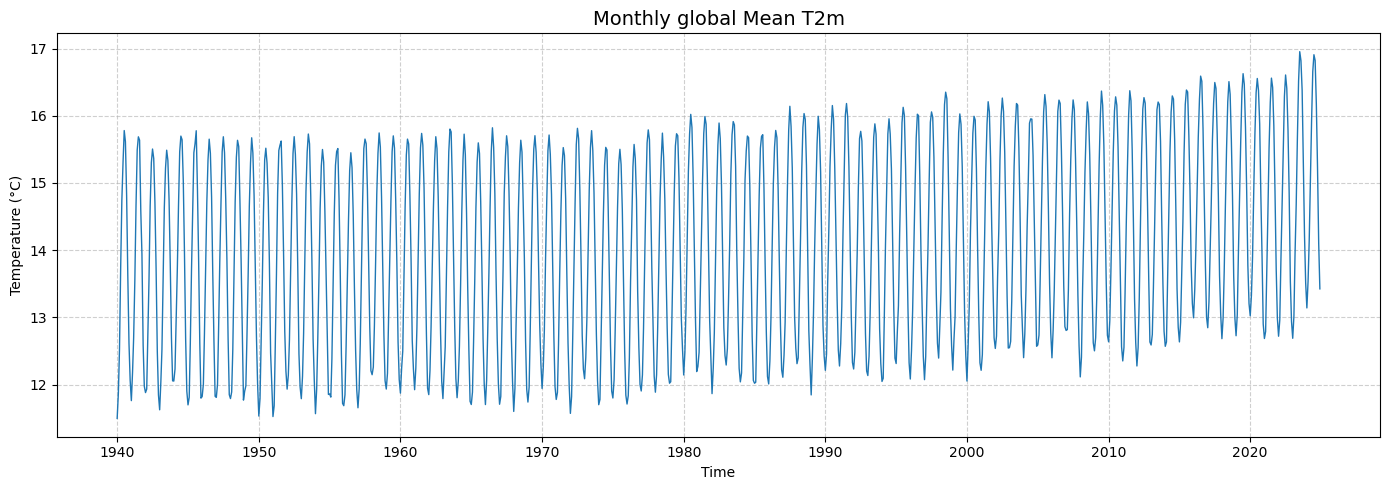

In [27]:
# Plot monthly time series 
plt.figure(figsize=(14, 5))
global_t2m.plot(color='tab:blue', linewidth=1)
plt.title('Monthly global Mean T2m', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
# Compute monthly climatology
global_t2m_monclim = global_t2m.groupby('time.month').mean('time')
global_t2m_monclim

<xarray.DataArray 't2m' (month: 12)> Size: 96B
array([12.10764356, 12.36242868, 13.05646192, 14.02667341, 14.97720332,
       15.68427607, 15.94543573, 15.80691543, 15.12172507, 14.10490575,
       13.00914408, 12.33648994])
Coordinates:
    number   int64 8B 0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

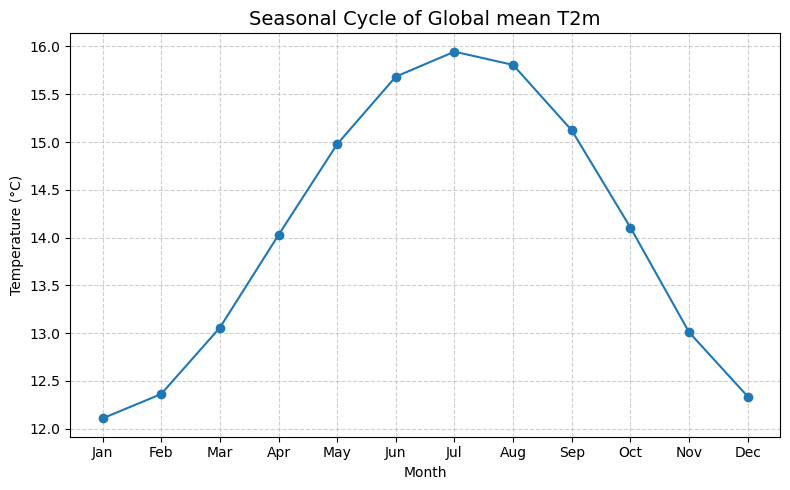

In [29]:
# Plot seasonal cycle
plt.figure(figsize=(8, 5))
plt.plot(global_t2m_monclim['month'], global_t2m_monclim, marker='o', color='tab:blue')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Cycle of Global mean T2m', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
# Calculate anomaly by subtracting the monthly climatology from each time point
global_t2m_monanom = global_t2m.groupby('time.month') - global_t2m_monclim
global_t2m_monanom

<xarray.DataArray 't2m' (time: 1020)> Size: 8kB
array([-0.61097895, -0.49026297, -0.53246015, ...,  1.14036122,
        1.08933296,  1.08739307], shape=(1020,))
Coordinates:
    number   (time) int64 8kB 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2024-12-01
    expver   (time) <U4 16kB '0001' '0001' '0001' ... '0001' '0001' '0001'
    month    (time) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

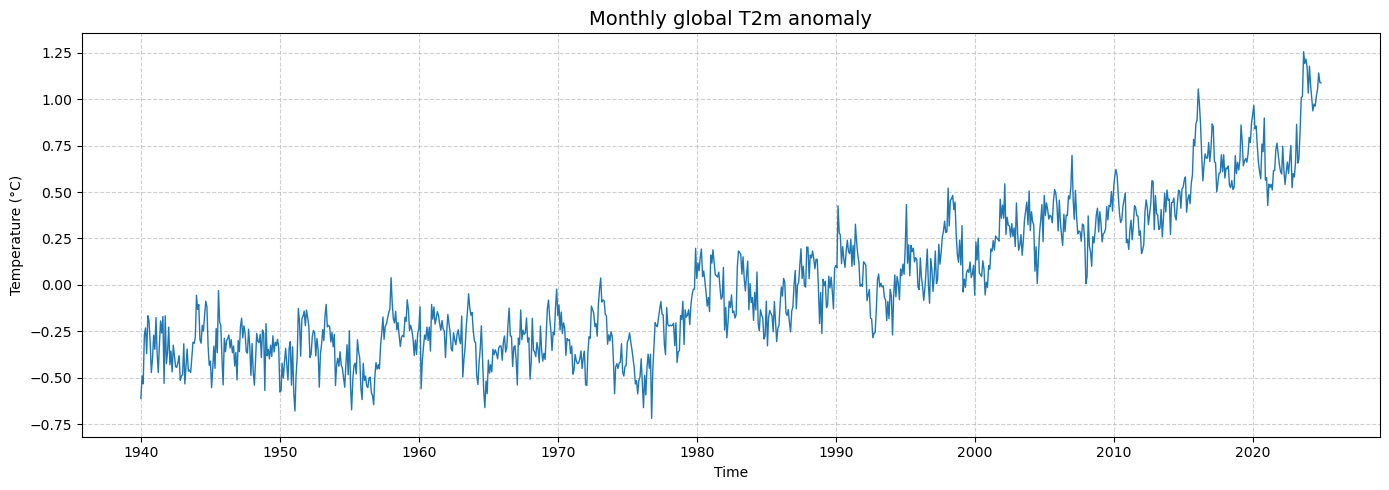

In [31]:
# Plot monthly time series
plt.figure(figsize=(14, 5))
global_t2m_monanom.plot(color='tab:blue', linewidth=1)
plt.title('Monthly global T2m anomaly', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Example 3: T2m near Dallas, TX

In [32]:
dallas_lat = 32.7767
dallas_lon = -96.7970

# Select the grid point nearest to Dallas
dallas_t2m = t2m.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')

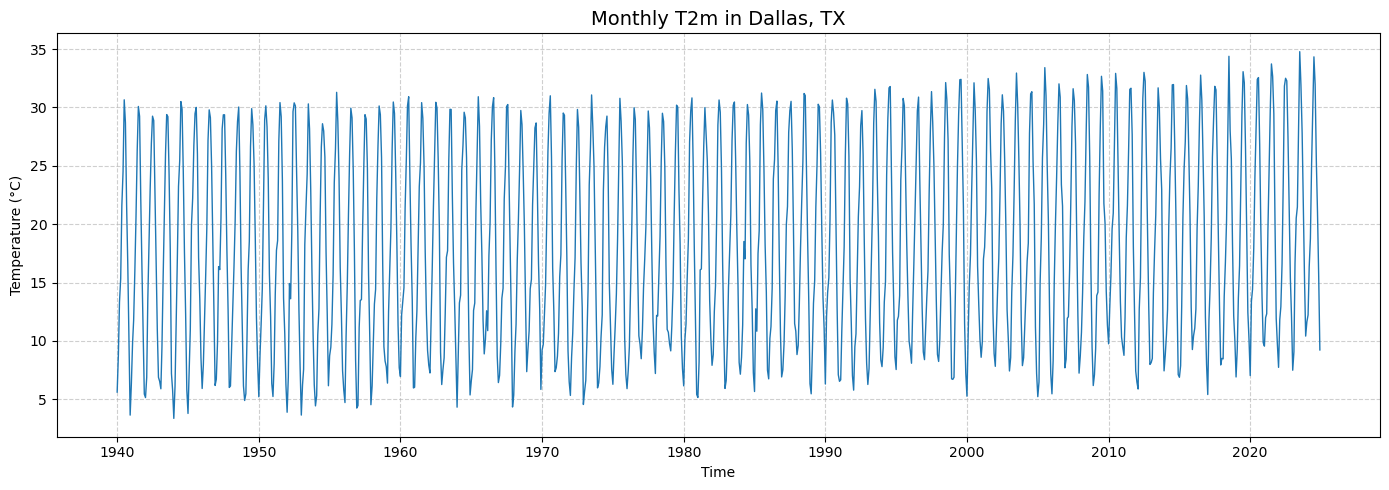

In [33]:
# Plot monthly time series
plt.figure(figsize=(14, 5))
dallas_t2m.plot(color='tab:blue', linewidth=1)
plt.title('Monthly T2m in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
# Compute monthly climatology
dallas_t2m_monclim = dallas_t2m.groupby('time.month').mean('time')
dallas_t2m_monclim

<xarray.DataArray 't2m' (month: 12)> Size: 48B
array([ 6.935409 ,  9.239902 , 12.754803 , 16.483402 , 21.45881  ,
       27.04102  , 30.866995 , 30.047367 , 24.994347 , 18.408798 ,
       12.042634 ,  7.6915183], dtype=float32)
Coordinates:
    number   int64 8B ...
    lat      float64 8B 32.75
    lon      float64 8B 0.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

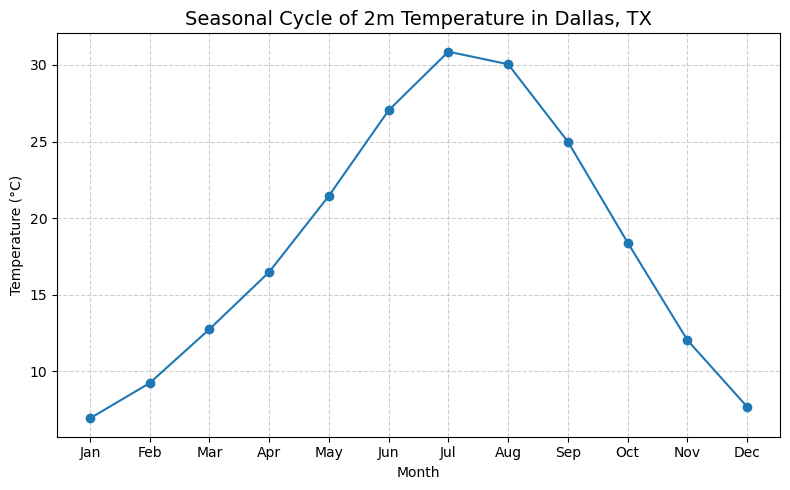

In [35]:
# Plot seasonal cycle
plt.figure(figsize=(8, 5))
plt.plot(dallas_t2m_monclim['month'], dallas_t2m_monclim, marker='o', color='tab:blue')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Cycle of 2m Temperature in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
# Calculate anomaly by subtracting the monthly climatology from each time point
dallas_t2m_monanom = dallas_t2m.groupby('time.month') - dallas_t2m_monclim
dallas_t2m_monanom

<xarray.DataArray 't2m' (time: 1020)> Size: 4kB
array([-1.3194728 , -0.46371746,  0.5883064 , ...,  2.6059418 ,
        3.4591665 ,  1.5339761 ], shape=(1020,), dtype=float32)
Coordinates:
    number   (time) int64 8kB 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2024-12-01
    lat      (time) float64 8kB 32.75 32.75 32.75 32.75 ... 32.75 32.75 32.75
    lon      (time) float64 8kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    expver   (time) <U4 16kB '0001' '0001' '0001' ... '0001' '0001' '0001'
    month    (time) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

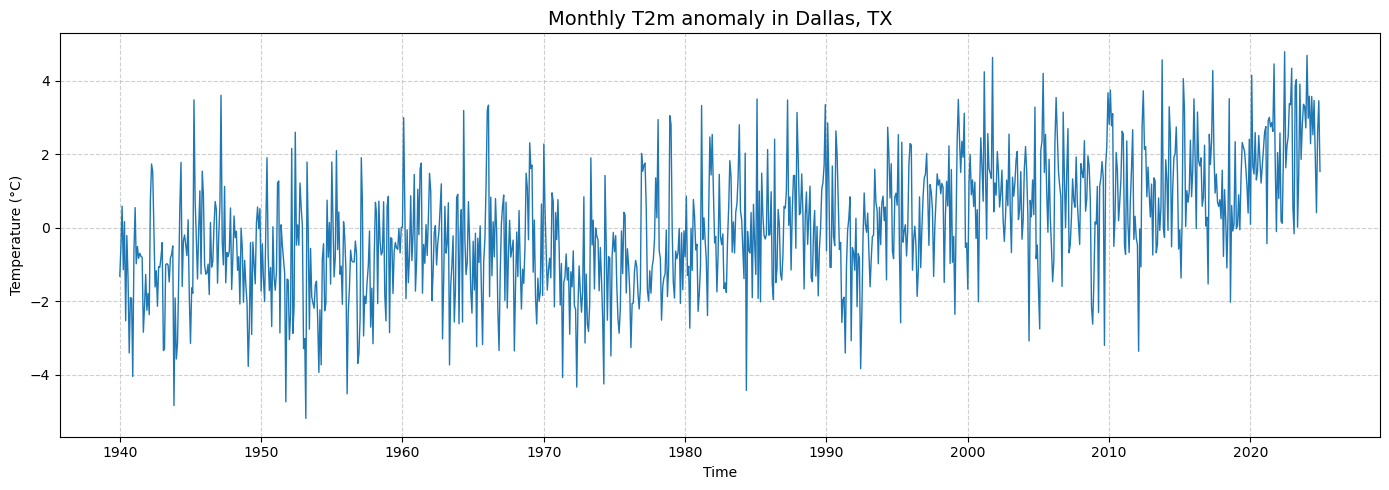

In [37]:
# Plot monthly time series
plt.figure(figsize=(14, 5))
dallas_t2m_monanom.plot(color='tab:blue', linewidth=1)
plt.title('Monthly T2m anomaly in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

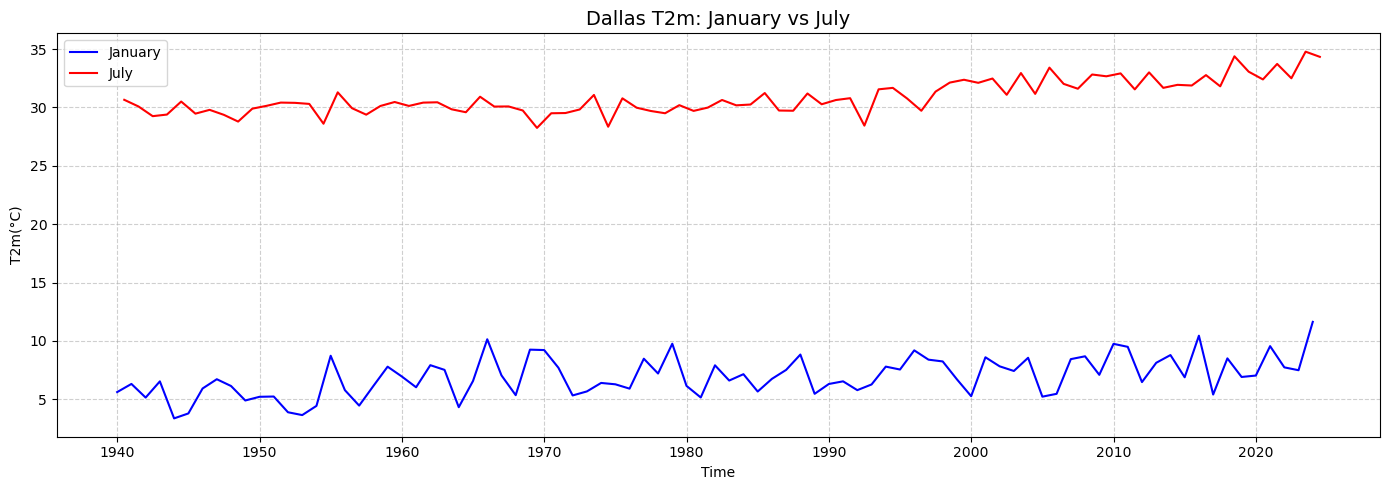

In [38]:
# Extract January (month=1) and July (month=7) anomalies
dallas_t2m_jan = dallas_t2m.sel(time=dallas_t2m_monanom['time.month'] == 1)
dallas_t2m_jul = dallas_t2m.sel(time=dallas_t2m_monanom['time.month'] == 7)

plt.figure(figsize=(14, 5))
plt.plot(dallas_t2m_jan['time'], dallas_t2m_jan, color='blue', label='January')
plt.plot(dallas_t2m_jul['time'], dallas_t2m_jul, color='red', label='July')

plt.title('Dallas T2m: January vs July', fontsize=14)
plt.xlabel('Time')
plt.ylabel('T2m(°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

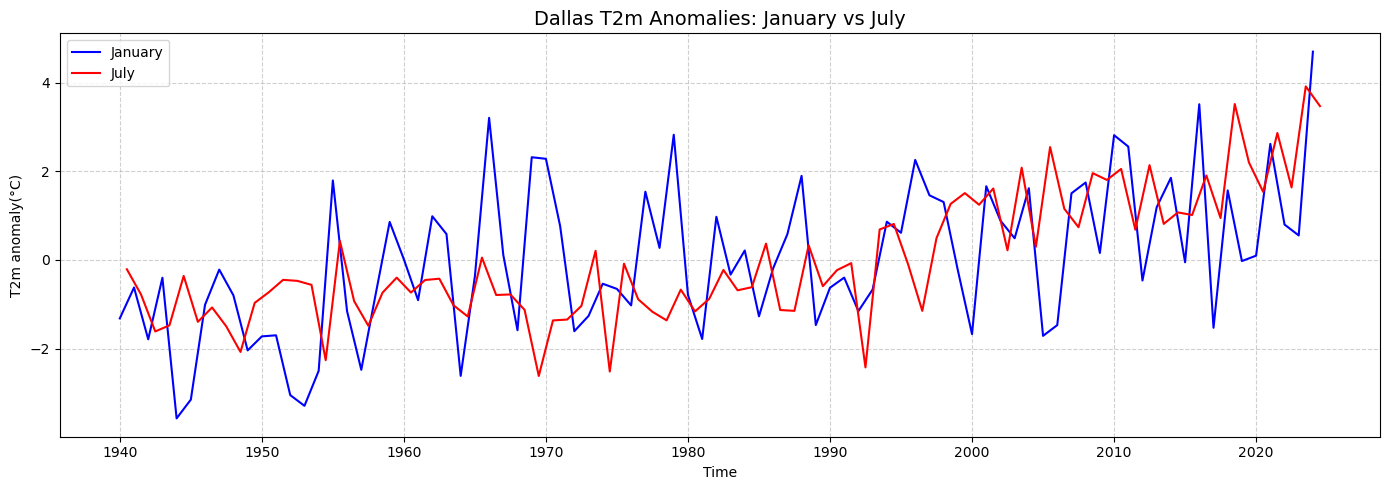

In [39]:
# Extract January (month=1) and July (month=7) anomalies
dallas_t2m_jananom = dallas_t2m_monanom.sel(time=dallas_t2m_monanom['time.month'] == 1)
dallas_t2m_julanom = dallas_t2m_monanom.sel(time=dallas_t2m_monanom['time.month'] == 7)

plt.figure(figsize=(14, 5))
plt.plot(dallas_t2m_jananom['time'], dallas_t2m_jananom, color='blue', label='January')
plt.plot(dallas_t2m_julanom['time'], dallas_t2m_julanom, color='red', label='July')

plt.title('Dallas T2m Anomalies: January vs July', fontsize=14)
plt.xlabel('Time')
plt.ylabel('T2m anomaly(°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Q4: T2m Analysis for a New Location

Pick a location that interests you and perform the same surface air temperature (T2m) analysis that we previously did for Dallas. For this new location, you should:

Q4.1. **Monthly Climatology (2 points)**  
   - Compute and plot the average temperature for each month across all years (climatology).  
   - Discuss the seasonal cycle for this location. How does it compare with Dallas? Are summers or winters hotter/cooler than Dallas?  

Q4.2. **Time Series Analysis of monthly T2m (2 points)**  
   - Calculate the monthly temperature anomalies by subtracting the monthly climatology from each month’s observed temperature.  
   - Discuss periods with unusually high or low temperatures. Are there any notable trends, extreme years?  

Q4.3. **Time Series Comparison of January vs. July T2m (2 points)**  
   - Compute and plot the time series of January and July temperatures over the available period.  
   - Write a brief interpretation discussing how winter and summer temperatures have fluctuated over time. Are there any notable trends, extreme years, or unusual patterns in these months?  

**Optional:** If your location has a different climate type than Dallas (e.g., tropical, polar, coastal), comment on how this might explain the differences you see in the climatology and anomalies.  